In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
x=pd.read_csv('output1.csv')  #this is mice treatmnet data as output1

In [4]:
x.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'url', 'timedelta',
       'data_channel_is_lifestyle', 'data_channel_is_entertainment',
       'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [5]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 62 columns):
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
kw_min_min                       39644 non-null float64
kw_max_min                       39644 non-null float64
kw_avg_min                       39644 non-null float64
kw_min_max                       39644 non-null float64
kw_max_max                       39644 non-null flo

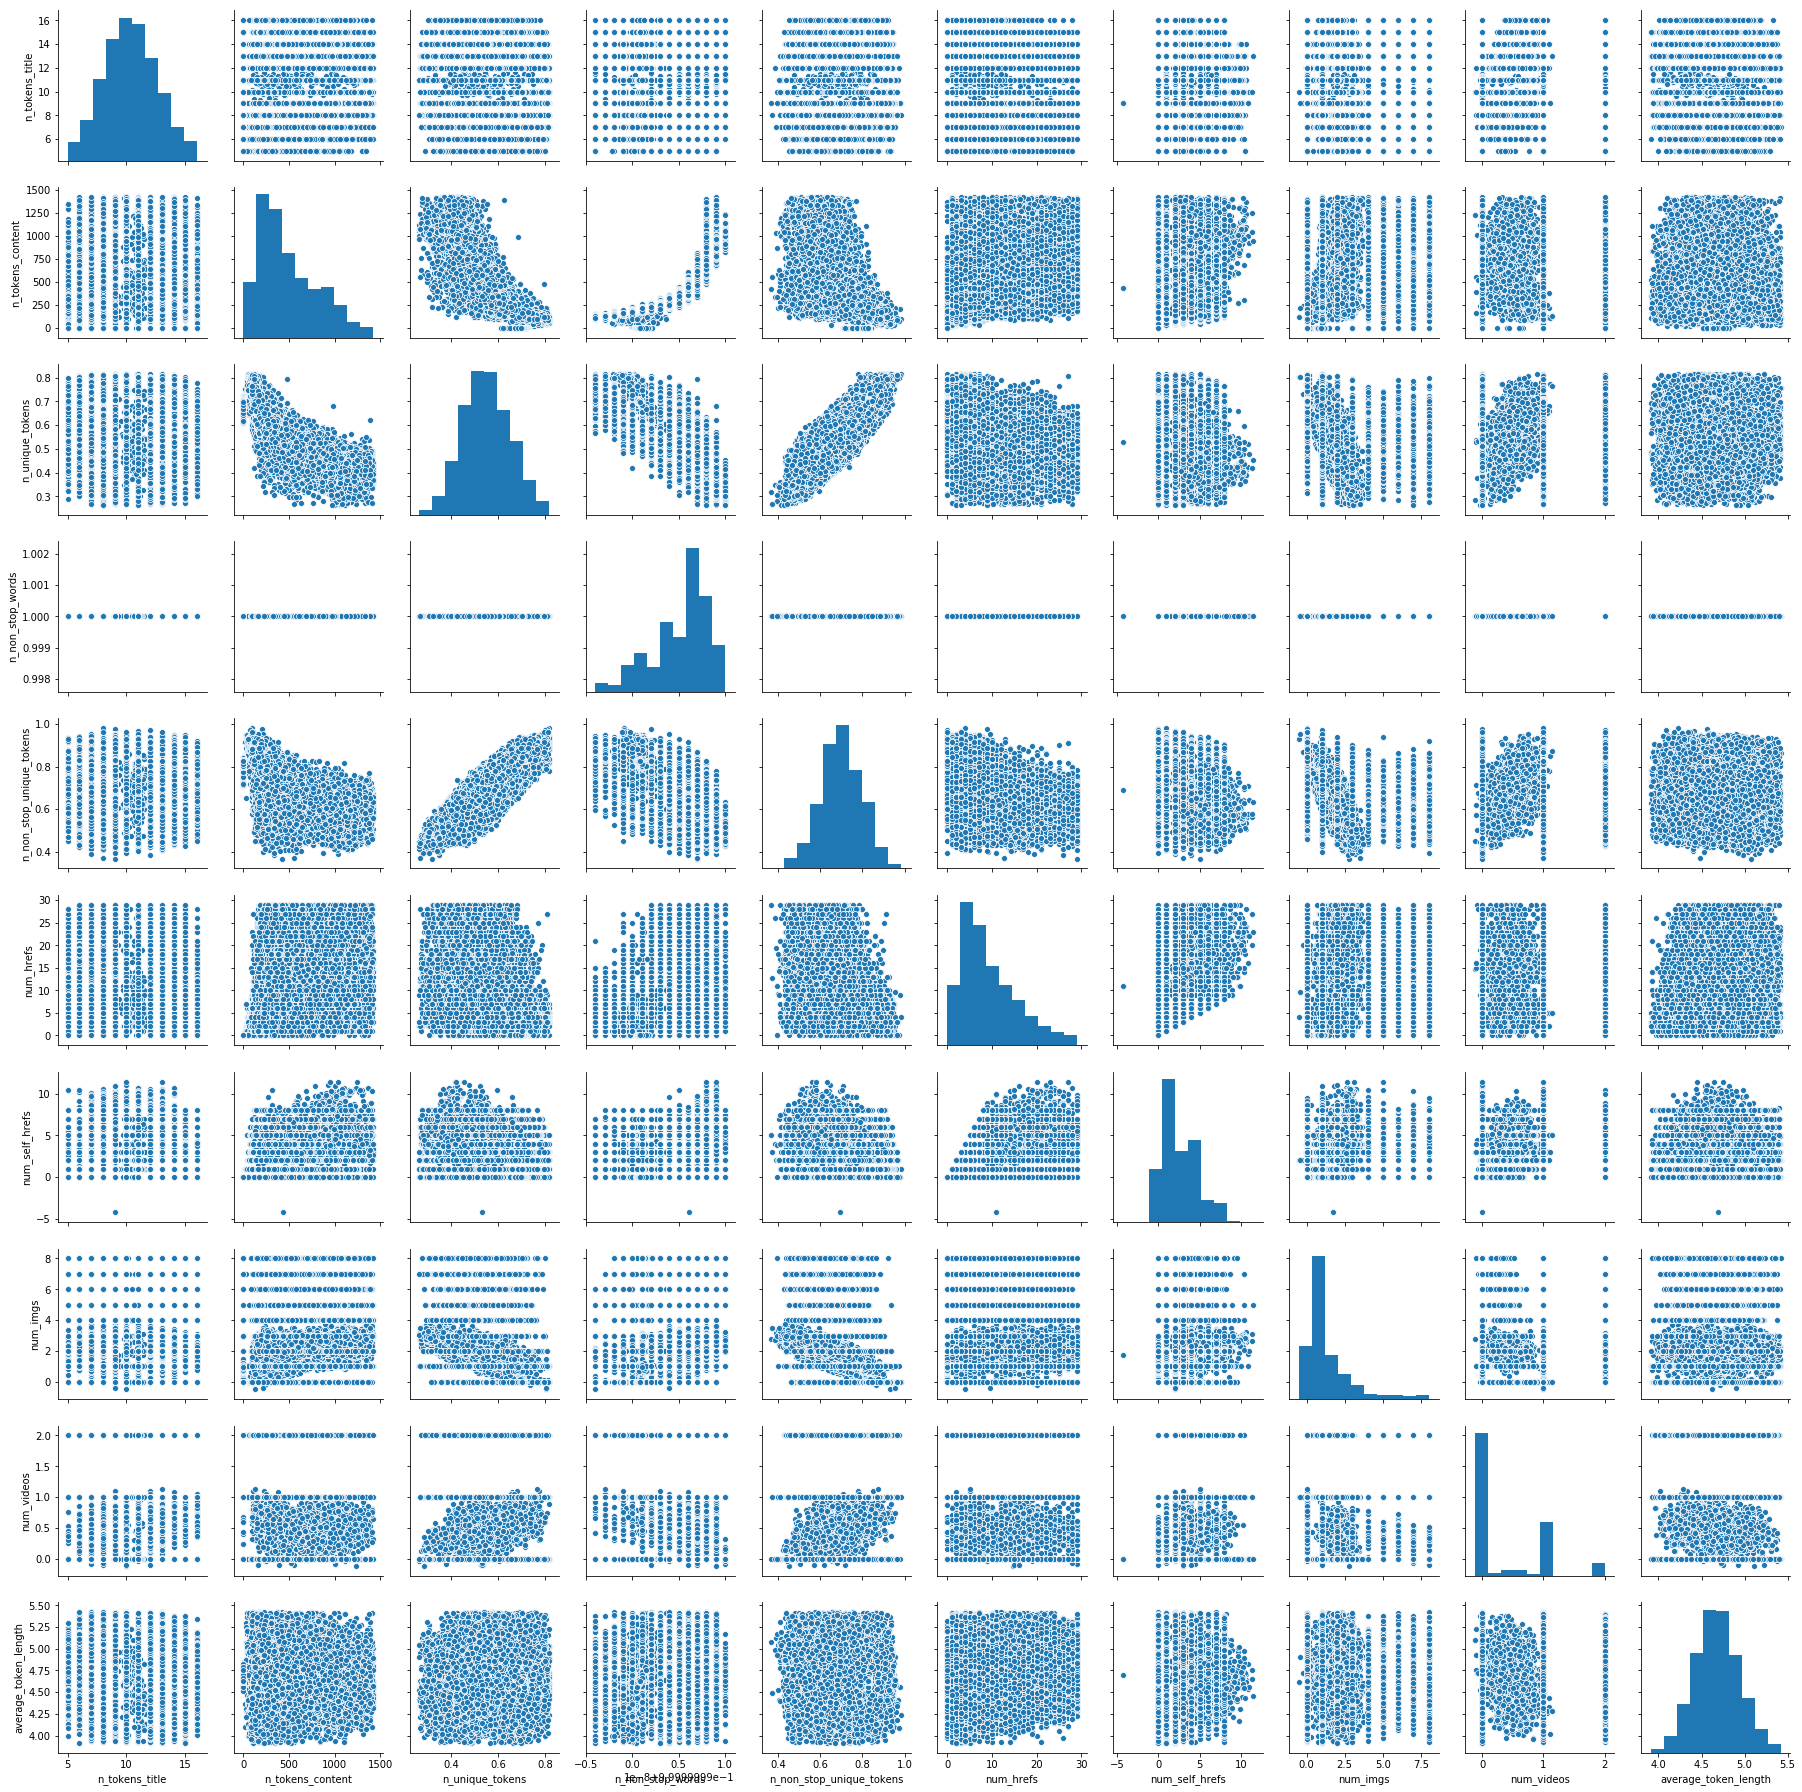

In [5]:
import seaborn
seaborn.pairplot(x.iloc[:,:10])

In [6]:
X=x.data

AttributeError: 'DataFrame' object has no attribute 'data'

## inverse of dummified  data channel  and weekday columns

In [6]:
data_channel=x.iloc[:,25:31]

In [7]:
data_channel.head()

,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,0,0,0,0,1,0


In [8]:
data_channel_out=pd.DataFrame(data_channel.idxmax(axis=1),columns={'data_channel1'})

In [9]:
data_channel_out['channel']=data_channel_out['data_channel1'].str.split('is_').str[-1]

In [10]:
data_channel_out.drop('data_channel1',axis=1,inplace=True)

In [11]:
data_channel_out.head()

,channel
0,entertainment
1,bus
2,bus
3,entertainment
4,tech


In [12]:
weekday=x.iloc[:,31:39]
weekday.head()

,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend
0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0


In [13]:
weekday_out=pd.DataFrame(weekday.idxmax(axis=1),columns={'weekday1'})

In [14]:
weekday_out['weekdays']=weekday_out['weekday1'].str.split('is_').str[-1]

In [15]:
weekday_out.drop('weekday1',axis=1,inplace=True)

In [16]:
weekday_out.head()

,weekdays
0,monday
1,monday
2,monday
3,monday
4,monday


## joining the two columns to do Chisquare Test

In [17]:
final=data_channel_out.join(weekday_out)
final.shape

(39644, 2)

In [18]:
chi=pd.crosstab(final['channel'],final['weekdays'])
chi

weekdays,friday,monday,saturday,sunday,thursday,tuesday,wednesday
channel,,,,,,,
bus,832,1153,243,343,1234,1182,1271
entertainment,972,1358,380,536,1231,1285,1295
lifestyle,1271,1222,606,758,1460,1445,1471
socmed,332,337,180,137,463,458,416
tech,989,1235,525,396,1310,1474,1417
world,1305,1356,519,567,1569,1546,1565


## ChiSquare Test

In [20]:
import pandas      as pd
import numpy       as np
import scipy.stats as stats

quality_array = np.array([[832,1153,243,343,1234,1182,1271],[972,1358,380,536,1231,1285,1295],[1271,1222,606,758,1460,1445,1471],
                        [332,337,180,137,463,458,416],[989,1235,525,396,1310,1474,1417],[1305,1356,519,567,1569,1546,1565]])
chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(quality_array)

print('Chi-square statistic, P value, Degrees of freedom :',chi_sq_Stat, p_value,deg_freedom)

Chi-square statistic, P value, Degrees of freedom : 348.47870644596094 6.318194599126128e-56 30


There is a significant difference in viewing of channel in whole week  p<alpha so null hypothesis rejected. 

## Transforming columns:

In [50]:
y=x.drop(['shares','url','timedelta'],axis=1)

In [21]:
num_columns=y.columns

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


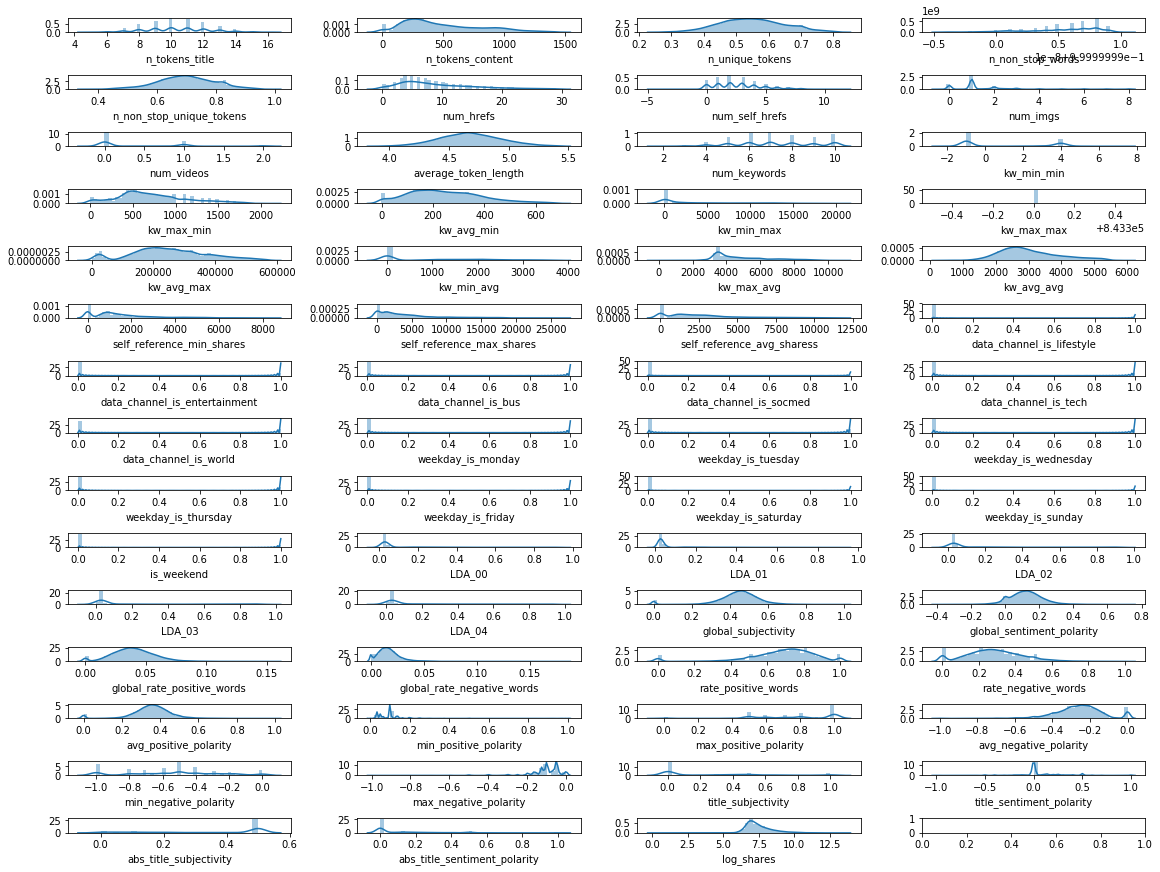

In [52]:
figs, axes = plt.subplots(15,4, figsize=(16,12), constrained_layout=True)
for col, ax in zip(num_columns, axes.flat):
    sns.distplot(x[col], ax=ax)
plt.show()

In [51]:
y[num_columns].skew().values




pd.DataFrame({"Columns":num_columns, "Before Transformation":y[num_columns].skew().values,
              "After Transformation":np.power(y[num_columns],1/5).skew().values}).sort_values("Before Transformation")
              
              

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in power
  import sys


,Columns,Before Transformation,After Transformation
53,max_negative_polarity,-3.459747,0.000000
46,rate_positive_words,-1.423106,-4.886488
42,global_subjectivity,-1.372689,-5.084402
50,max_positive_polarity,-0.939756,-4.556839
48,avg_positive_polarity,-0.724795,-4.851322
56,abs_title_subjectivity,-0.624149,-2.346693
51,avg_negative_polarity,-0.551644,0.000000
10,num_keywords,-0.115475,-0.562952
52,min_negative_polarity,-0.073155,0.000000
4,n_non_stop_unique_tokens,-0.067087,-0.392470


In [51]:
X = y.drop('log_shares', axis = 1)
Y = y['log_shares']
X.shape
Y.shape

(39644,)

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 123)

NameError: name 'X' is not defined

In [1]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train_scaled,Y_train)
y_pred=lm.predict(X_test_scaled)
print('training_ accuracy:  ',lm.score(X_train_scaled, Y_train)*100)
print('testing_ accuracy:  ',lm.score(X_test_scaled, Y_test)*100)

NameError: name 'X_train' is not defined

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,y_pred) ) #r^2
print(np.sqrt(mean_squared_error(Y_test,y_pred)))  #rmse

0.13243477840629947
0.8752902706282967


In [57]:
y_pred_inv = np.exp(y_pred)
print(y_pred_inv.mean())

1866.5714254081704


In [58]:
print(r2_score(Y_test,y_pred_inv) ) #r^2
print(np.sqrt(mean_squared_error(Y_test,y_pred_inv)))  #rmse

-4427080.896285113
1977.2419319061182


In [34]:
from xgboost.sklearn import XGBRegressor

In [35]:
xgb= XGBRegressor()
xgb.fit(X_train_scaled,Y_train)
y_pred=xgb.predict(X_test_scaled)
print('training_ accuracy:  ',xgb.score(X_train_scaled, Y_train)*100)

print('testing_ accuracy:  ',xgb.score(X_test_scaled, Y_test)*100)

C:\Users\DELL\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[20:23:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
training_ accuracy:   30.305079406105285
testing_ accuracy:   -0.9355728366024385


In [36]:
from sklearn.metrics import r2_score,mean_squared_error
print(r2_score(Y_test,y_pred) ) #r^2
print(np.sqrt(mean_squared_error(Y_test,y_pred)))  #rmse

-0.009355728366024385
15123.022782358812


In [37]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train_scaled,Y_train)
y_pred=dt.predict(X_test_scaled)
print('training_ accuracy:  ',dt.score(X_train_scaled, Y_train)*100)
print('testing_ accuracy:  ',dt.score(X_test_scaled, Y_test)*100)

training_ accuracy:   100.0
testing_ accuracy:   -33.289524985107974


In [38]:
print(np.sqrt(mean_squared_error(Y_test,y_pred)))

17378.588123944002


In [39]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train_scaled,Y_train)
y_pred=rf.predict(X_test_scaled)
print('training_ accuracy:  ',rf.score(X_train_scaled, Y_train)*100)
print('testing_ accuracy:  ',rf.score(X_test_scaled, Y_test)*100)

C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


training_ accuracy:   74.60623207762241
testing_ accuracy:   -7.405051753337988


In [40]:
print(np.sqrt(mean_squared_error(Y_test,y_pred)))

15600.152172108154


In [17]:
import statsmodels.formula.api as smf

In [18]:
x['constant']=1

In [19]:
model=smf.OLS(endog=Y,exog=X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_shares   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     112.5
Date:                Wed, 30 Oct 2019   Prob (F-statistic):               0.00
Time:                        20:01:22   Log-Likelihood:                -50565.
No. Observations:               39644   AIC:                         1.012e+05
Df Residuals:                   39589   BIC:                         1.017e+05
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title                    0.0052      0.002      2.320      0.020       0.001       0.010
n_tokens_content               6.345e-05   3.23e-05      1.965      0.049    1.54e-07       0.000
n_unique_tokens                  -0.3285      0.178     -1.841      0.066      -0.678       0.021
n_non_stop_words              -2.169e+07   3.44e+06     -6.301      0.000   -2.84e+07   -1.49e+07
n_non_stop_unique_tokens         -0.1867      0.128     -1.458      0.145      -0.438       0.064
num_hrefs                         0.0074      0.001      8.200      0.000       0.006       0.009
num_self_hrefs                   -0.0178      0.003     -6.482      0.000      -0.023      -0.012
num_imgs                          0.0104      0.003      3.018      0.003       0.004       0.017
num_videos                        0.0940      0.008     11.400      0.000       0.078       0.110
average_token_length             -0.0145      0.021     -0.698      0.485      -0.055       0.026
num_keywords                     -0.0034      0.003     -1.118      0.264      -0.009       0.003
kw_min_min                       -0.0084      0.002     -3.599      0.000      -0.013      -0.004
kw_max_min                    -8.622e-05    2.2e-05     -3.920      0.000      -0.000   -4.31e-05
kw_avg_min                        0.0005   7.08e-05      6.814      0.000       0.000       0.001
kw_min_max                     1.151e-06   1.82e-06      0.632      0.527   -2.42e-06    4.72e-06
kw_max_max                       25.7254      4.083      6.301      0.000      17.723      33.728
kw_avg_max                    -4.983e-07   6.31e-08     -7.899      0.000   -6.22e-07   -3.75e-07
kw_min_avg                    -3.356e-05   9.23e-06     -3.637      0.000   -5.16e-05   -1.55e-05
kw_max_avg                    -5.494e-07   5.77e-06     -0.095      0.924   -1.19e-05    1.08e-05
kw_avg_avg                        0.0002   1.46e-05     16.677      0.000       0.000       0.000
self_reference_min_shares      3.992e-05   7.83e-06      5.101      0.000    2.46e-05    5.53e-05
self_reference_max_shares      7.969e-06   4.25e-06      1.875      0.061   -3.63e-07    1.63e-05
self_reference_avg_sharess     7.432e-06   9.65e-06      0.770      0.441   -1.15e-05    2.63e-05
data_channel_is_lifestyle        -0.1455      0.030     -4.900      0.000      -0.204      -0.087
data_channel_is_entertainment    -0.2209      0.019    -11.650      0.000      -0.258      -0.184
data_channel_is_bus              -0.1853      0.029     -6.426      0.000      -0.242      -0.129
data_channel_is_socmed            0.0833      0.028      2.996      0.003       0.029       0.138
data_channel_is_tech              0.0533      0.028      1.911      0.056      -0.001       0.108
data_channel_is_world            -0.1147     

In [20]:
z=x.drop('log_shares',axis=1)

In [21]:
model = smf.OLS(z.shares,z.drop(["shares","url","timedelta","LDA_00","LDA_03","data_channel_is_tech","data_channel_is_bus","data_channel_is_socmed","data_channel_is_lifestyle","data_channel_is_world","LDA_01","LDA_04","global_sentiment_polarity","global_rate_negative_words","avg_positive_polarity","avg_positive_polarity","max_positive_polarity","avg_negative_polarity","max_negative_polarity","title_subjectivity","title_sentiment_polarity","n_tokens_content","n_unique_tokens","abs_title_subjectivity","abs_title_sentiment_polarity","num_imgs","average_token_length","num_keywords","kw_max_min","kw_avg_min","kw_min_max","kw_max_avg","self_reference_min_shares","self_reference_max_shares"],axis=1)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 shares   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     36.91
Date:                Wed, 30 Oct 2019   Prob (F-statistic):          1.49e-169
Time:                        20:01:22   Log-Likelihood:            -4.2692e+05
No. Observations:               39644   AIC:                         8.539e+05
Df Residuals:                   39619   BIC:                         8.541e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
n_tokens_title                   89.6669     29.130      3.078      0.002      32.571     146.763
n_non_stop_words              -1.513e+11   3.22e+10     -4.698      0.000   -2.14e+11   -8.82e+10
n_non_stop_unique_tokens      -1970.7717    873.849     -2.255      0.024   -3683.536    -258.007
num_hrefs                        68.9435     11.096      6.213      0.000      47.195      90.692
num_self_hrefs                 -165.0699     32.276     -5.114      0.000    -228.331    -101.809
num_videos                      851.7680    106.567      7.993      0.000     642.895    1060.641
kw_min_min                      104.3907     28.044      3.722      0.000      49.424     159.358
kw_max_max                     1.794e+05   3.82e+04      4.698      0.000    1.05e+05    2.54e+05
kw_avg_max                       -0.0014      0.001     -2.299      0.021      -0.003      -0.000
kw_min_avg                       -0.2301      0.063     -3.626      0.000      -0.355      -0.106
kw_avg_avg                        1.2497      0.099     12.655      0.000       1.056       1.443
self_reference_avg_sharess        0.2135      0.024      8.801      0.000       0.166       0.261
data_channel_is_entertainment  -897.4531    161.350     -5.562      0.000   -1213.703    -581.203
weekday_is_monday              4.129e+04   8717.287      4.736      0.000    2.42e+04    5.84e+04
weekday_is_tuesday             4.077e+04   8716.935      4.677      0.000    2.37e+04    5.79e+04
weekday_is_wednesday           4.093e+04   8717.057      4.695      0.000    2.38e+04     5.8e+04
weekday_is_thursday            4.076e+04   8715.951      4.676      0.000    2.37e+04    5.78e+04
weekday_is_friday              4.081e+04   8715.706      4.683      0.000    2.37e+04    5.79e+04
weekday_is_saturday            2.353e+04   4960.519      4.743      0.000    1.38e+04    3.33e+04
weekday_is_sunday              2.323e+04   4957.485      4.686      0.000    1.35e+04    3.29e+04
is_weekend                     1.786e+04   3763.431      4.747      0.000    1.05e+04    2.52e+04
LDA_02                         -929.4506    244.154     -3.807      0.000   -1407.999    -450.902
global_subjectivity            2868.7773    768.177      3.735      0.000    1363.132    4374.423
global_rate_positive_words    -1.249e+04   4755.555     -2.627      0.009   -2.18e+04   -3173.671
rate_positive_words           -1506.1276    571.443     -2.636      0.008   -2626.170    -386.085
rate_negative_words           -1793.6151    602.351     -2.978      0.003   -2974.238    -612.992
min_positive_polarity         -3410.6636    976.291     -3.493      0.000   -5324.217   -1497.111
min_negative_polarity          -975.3129    276.023     -3.533      0.000   -1516.324    -434.301
constant                       4.767e+05   1.